## K - Means Implementation

The below code cell has the core implementation of K-Means

In [ ]:

import numpy as np

class k_means():

  def __init__(self, k = 3, tol=1e-9):
    '''
    Input :
    1) number of clusters k
    '''
    self.k = k
    self.tol = tol
    self.old_centers = np.array([])

  def euclidean_distance(self, p1, p2):
    '''
    Calculates the euclidean distance between two points
    Input:
    1) p1 has the dimension 1xn
    2) p2 has the dimension 1xn
    Output:
    1) distance is the euclidean distance between point p1, and p2
    '''
    distance = np.linalg.norm(p2-p1)
    return distance

  def label_fetcher(self, distance_metric_T):
    '''
    Calculates the label of each data points with respect to cluster number.
    Input:
    1) The distance metric is a matrix which contains distances of all points with respect to each cluster. The transpose will have each row as a datapoint's distance to each cluster center
    Output:
    1) label_array is the array containing labels of each data points
    '''
    labels = []
    for row in distance_metric_T:
      self.row = row
      min_index = np.argmin(row)
      labels.append(min_index)
    
    return np.array(labels)



  def points_to_cluster_distance(self, data_points, cluster_center):
    '''
    Calculates the distance array of data_points with respect to the cluster_center
    Input :
    1) data_points
    2) cluster_center has the dimension 1xn
    Output:
    1) Returns the distance array
    '''
    distance_array = []
    # Calculating the distance of each point with the cluster center below, and appending it to the distance array
    for point in data_points:
      dist = self.euclidean_distance(point, cluster_center)
      distance_array.append(dist)
    distance_array = np.array(distance_array)
    return distance_array


  def breaking_condition(self, cluster_center, old_center):
    self.cluster_center = cluster_center
    self.old_center = old_center
    cluster_center = np.concatenate(cluster_center)
    old_center = np.concatenate(old_center)
    dist = self.euclidean_distance(cluster_center, old_center)
    return dist

  def fit(self, data):
    '''
    This function will find the cluster centers, and the assign cluster labels to each samples.
    Input :
    1) data:
       data has the dimension m x n, where m is the number of samples, and n is the dimension. The format of data must be a numpy array.

    Output:
    1) cluster_centers:
        It is a list which contains each cluster centers
    2) labels:
        The labels assigned to each data point, and has the dimension m x 1
    '''
    k = self.k
    iteration = 0
    # Randomly intializing the clusters
    cluster_centers = []
    for i in range(k):
      cluster_centers.append(np.squeeze(np.random.randn(1, data.shape[1])))
    
    self.debug = cluster_centers

    while(1):
      iteration += 1
      clusters = {}
      labels = []
      for i in range(k):
        clusters[i] = []

      

      #Assigning points to the cluster
      for sample in data:
        distance_array = []
        for cluster in cluster_centers:
          distance = self.euclidean_distance(sample, cluster)
          distance_array.append(distance)
        min_index = np.argmin(distance_array)
        
        clusters[min_index].append(sample)
        labels.append(min_index)
      
      #Calculating mean
      old_centers = cluster_centers
      cluster_centers = []

      for i in range(k):
      
        if(len(clusters[i]) ==  0): # This handles the situation where clusters have 0 members, or empty cluster situation
          cluster_centers.append(np.squeeze(np.random.randn(1, data.shape[1])))
          continue
        mean = np.squeeze(np.mean(clusters[i], axis=0))
        cluster_centers.append(mean)

      # DEBUG
      self.cluster_centers = cluster_centers
      self.old_centers = old_centers
      if(self.breaking_condition(cluster_centers, old_centers) <= self.tol):
        break

    return clusters, cluster_centers, labels, iteration


      

    
    
    



  


In [ ]:
import pandas as pd
import csv
df = pd.read_csv('football_data.csv')
df_corrected = df.fillna(df.mean())

In [ ]:
df_corrected.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Release Clause',  ,])

SyntaxError: ignored

# Elbow method, and Silhoutte Score.



In [ ]:
def label_generator(data_points, clusters):
  k = len(clusters)
  labels = []
  for point in data_points:
    for j, cluster_points in clusters.items():
      #return cluster_points
      #print(cluster_points)
      cluster_points = np.array(cluster_points)
      if point in cluster_points:
        labels.append(j)
  return labels

In [ ]:
### TESTING ###
import pandas as pd
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()
data_numpy = data.to_numpy()

In [ ]:
kmeans = k_means(3)

In [ ]:
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

In [ ]:
labels[:5]

[2, 2, 2, 2, 2]

In [ ]:
data_numpy[:5]

array([[71.24, 28.  ],
       [52.53, 25.  ],
       [64.54, 27.  ],
       [55.69, 22.  ],
       [54.58, 25.  ]])

In [ ]:
clusters[2]

[array([71.24, 28.  ]),
 array([52.53, 25.  ]),
 array([64.54, 27.  ]),
 array([55.69, 22.  ]),
 array([54.58, 25.  ]),
 array([58.64, 20.  ]),
 array([31.25, 34.  ]),
 array([44.31, 19.  ]),
 array([49.35, 40.  ]),
 array([58.07, 45.  ]),
 array([44.22, 22.  ]),
 array([55.73, 19.  ]),
 array([46.63, 43.  ]),
 array([52.97, 32.  ]),
 array([46.25, 35.  ]),
 array([51.55, 27.  ]),
 array([57.05, 26.  ]),
 array([58.45, 30.  ]),
 array([43.42, 23.  ]),
 array([55.68, 37.  ]),
 array([43.84, 22.  ]),
 array([59.26, 32.  ]),
 array([37.14, 41.  ]),
 array([64.3, 29. ]),
 array([45.97, 23.  ]),
 array([56.04, 39.  ]),
 array([33.64, 45.  ]),
 array([41.67, 33.  ]),
 array([50.68, 39.  ]),
 array([54.22, 35.  ]),
 array([56.2, 29. ]),
 array([46.16, 41.  ]),
 array([50.22, 24.  ]),
 array([49.66, 33.  ]),
 array([38.61, 37.  ]),
 array([55.28, 36.  ]),
 array([57.87, 41.  ]),
 array([37.41, 21.  ]),
 array([53.83, 32.  ]),
 array([62.98, 22.  ]),
 array([58.03, 24.  ]),
 array([59.87, 36.  

In [ ]:
np.where(numpy.array(clusters[0]) == data_numpy[0])

(array([ 66, 110, 130]), array([1, 1, 1]))

In [ ]:
ti = np.array(clusters[2])
np.all(ti == data_numpy[0])

False

In [ ]:
np.where(ti[:,0] == data_numpy[0][0])

(array([], dtype=int64),)

True

(0.0, 100.0)

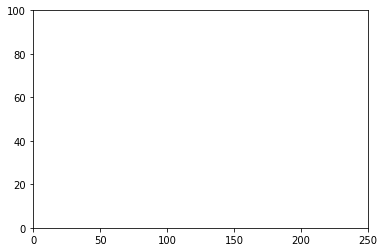

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlim(0,250)
ax.set_ylim(0,100)

In [ ]:
sns.scatterplot(data_numpy[:,0], data_numpy[:,1], ax = ax)
fig.savefig('test.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


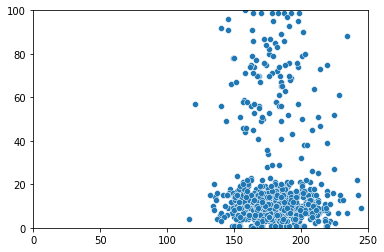

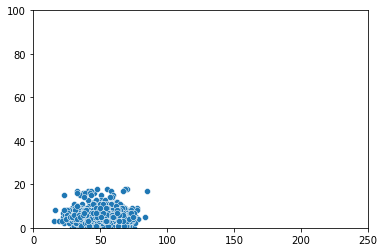

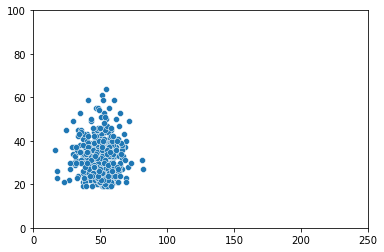

In [ ]:

for i in range(3):
  cluster = np.array(clusters[i])
  x,y = cluster[:,0], cluster[:,1]
  fig, ax = plt.subplots()
  ax.set_xlim(0,250)
  ax.set_ylim(0,100)
  sns.scatterplot(x,y, ax = ax)
  fig.savefig('test' + str(i) + '.png')

In [ ]:
cluster = np.array(clusters[i])
cluster.shape

(799, 2)

In [ ]:
labels = []
for point in data_numpy:

  for i in range(4):
    concat = np.concatenate(clusters[i]).reshape(-1,2)
    if point in concat:
      labels.append(i)
      break
      

In [ ]:
a = np.concatenate(clusters[0]).reshape(-1,2)

In [ ]:
data_numpy[5] in a

True

In [ ]:
data.shape

(4000, 2)

In [ ]:
np.random.randn(1, data.shape[1])

array([[ 1.80605286, -0.78256313]])